Missing Values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


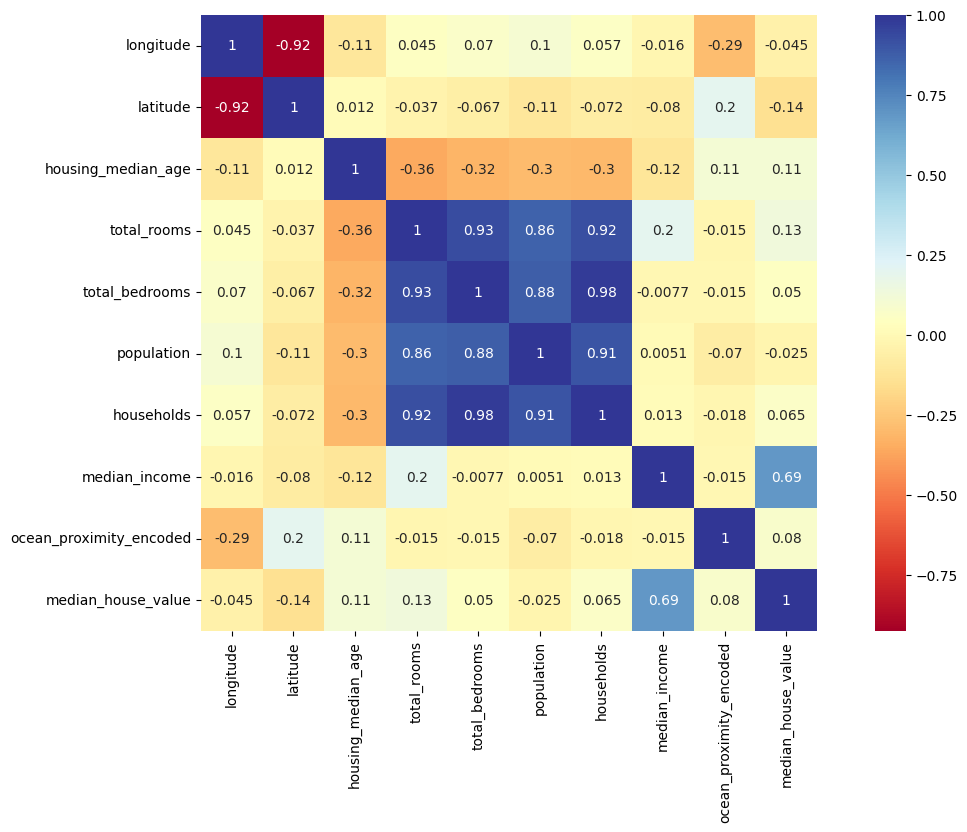

Mean Squared Error in Linear Reg: 4924108937.912002
Mean Squared Error in RF: 2449175194.7866817
Mean absolute Error in RF: 32151.671671152435


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('housing.csv')
# Count the number of missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
# Remove rows with missing values
data = data.dropna()

# Convert 'ocean_proximity' feature to numerical values using label_encoder
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])

# Mapping the encoded values back to the original categories (optional)
ocean_proximity_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
data['ocean_proximity_mapped'] = data['ocean_proximity_encoded'].map(ocean_proximity_mapping)


# Select the relevant features and target variable
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_encoded']]
y = data['median_house_value']

newdata = data[['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_encoded','median_house_value']]
plt.figure(figsize=(15,8))
sns.heatmap(newdata.corr(), annot=True, cmap='RdYlBu', square=True)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error in Linear Reg:', mse)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the same dataset
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error in RF:', mse)
print('Mean absolute Error in RF:', mae)